## Generate/visualize some example data

I assume Numpy is already installed with Pandas; if not: `!conda install numpy -y`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)  # Sets the seed for reproducibility

In [2]:
# Random Data Generation: Two sets of data points are generated using np.random.random() which produces random numbers between 0 and 1. 
#You can see how feature1 and feature2 are created for two different classes.
feature1 = []
for i in range(100):
    feature1.append(np.random.random())

len(feature1)

100

In [3]:
feature1[0:10]

[0.6964691855978616,
 0.28613933495037946,
 0.2268514535642031,
 0.5513147690828912,
 0.7194689697855631,
 0.42310646012446096,
 0.9807641983846155,
 0.6848297385848633,
 0.48093190148436094,
 0.3921175181941505]

In [4]:
feature2 = []
for i in range(100):
    feature2.append(np.random.random())

len(feature2)

100

In [5]:
# Two pandas DataFrames (df and df2) each with columns feature1, feature2, and a label to denote class membership
# Shifted by 0.5 or 0.6 to create distinct classes.
df = pd.DataFrame({'feature1': feature1, 'feature2': feature2})
df['label'] = 0

feature1 = []
for i in range(100):
    feature1.append(np.random.random() + .5)
    
feature2 = []
for i in range(100):
    feature2.append(np.random.random() + .6)
    
df2 = pd.DataFrame({'feature1': feature1, 'feature2': feature2})
df2['label'] = 1

# Concatenated into a single final_df combining both classes
final_df = pd.concat([df, df2], ignore_index=True)

final_df

,feature1,feature2,label
0,0.696469,0.513128,0
1,0.286139,0.666625,0
2,0.226851,0.105908,0
3,0.551315,0.130895,0
4,0.719469,0.321981,0
...,...,...,...
195,1.440029,0.960424,1
196,1.332716,0.810653,1
197,1.346055,1.021200,1
198,0.623923,0.818035,1


In [6]:
print(final_df.label.iloc[99])
print(final_df.label.iloc[100])

0
1


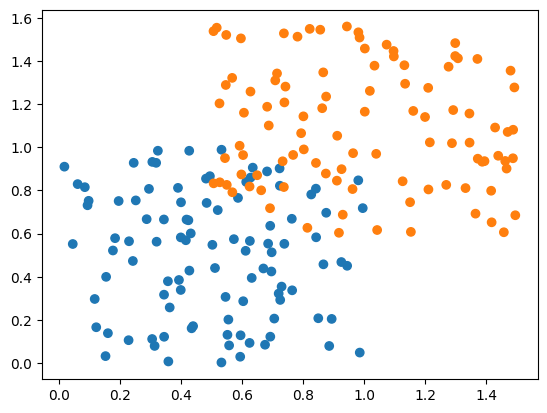

In [7]:
# Data Visualization: Let's assign colors to each class  
# C0 represents class 0 and C1 represents class 1. 
colors = []
for i in range(len(final_df)):
    colors.append('C' + str(int(final_df.label.iloc[i]))) 

# Create scatterplot
plt.scatter(final_df.feature1, final_df.feature2,
            c=['C' + str(int(c)) for c in final_df.label])
plt.show()
# Simpler way
# plt.scatter(final_df.feature1, final_df.feature2, c=colors)
# plt.show()

## Add a new point

What class should it belong to with K=1?

In [8]:
# Only run once as this adds a new row!
# This new data point has feature values [1.1, 0.7] and an outlier class 2 (not previously seen)
# Add this new point to location len(final_df), i.e., as last row in the DataFrame
final_df.loc[len(final_df)] = [1.1, 0.7, 2]

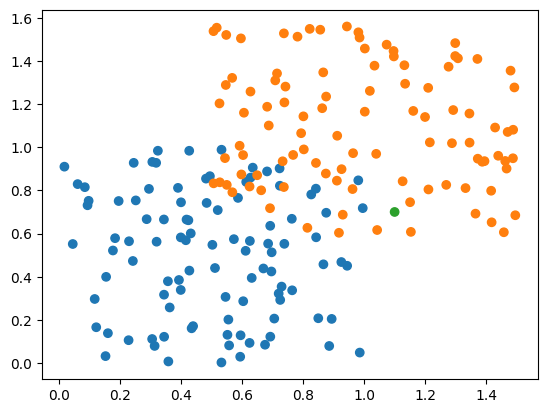

In [9]:
# Simpler way plt.scatter(final_df.feature1, final_df.feature2, c=colors) would not work here (new color!)
plt.scatter(final_df.feature1, final_df.feature2,
            c=['C' + str(int(c)) for c in final_df.label])
plt.show()

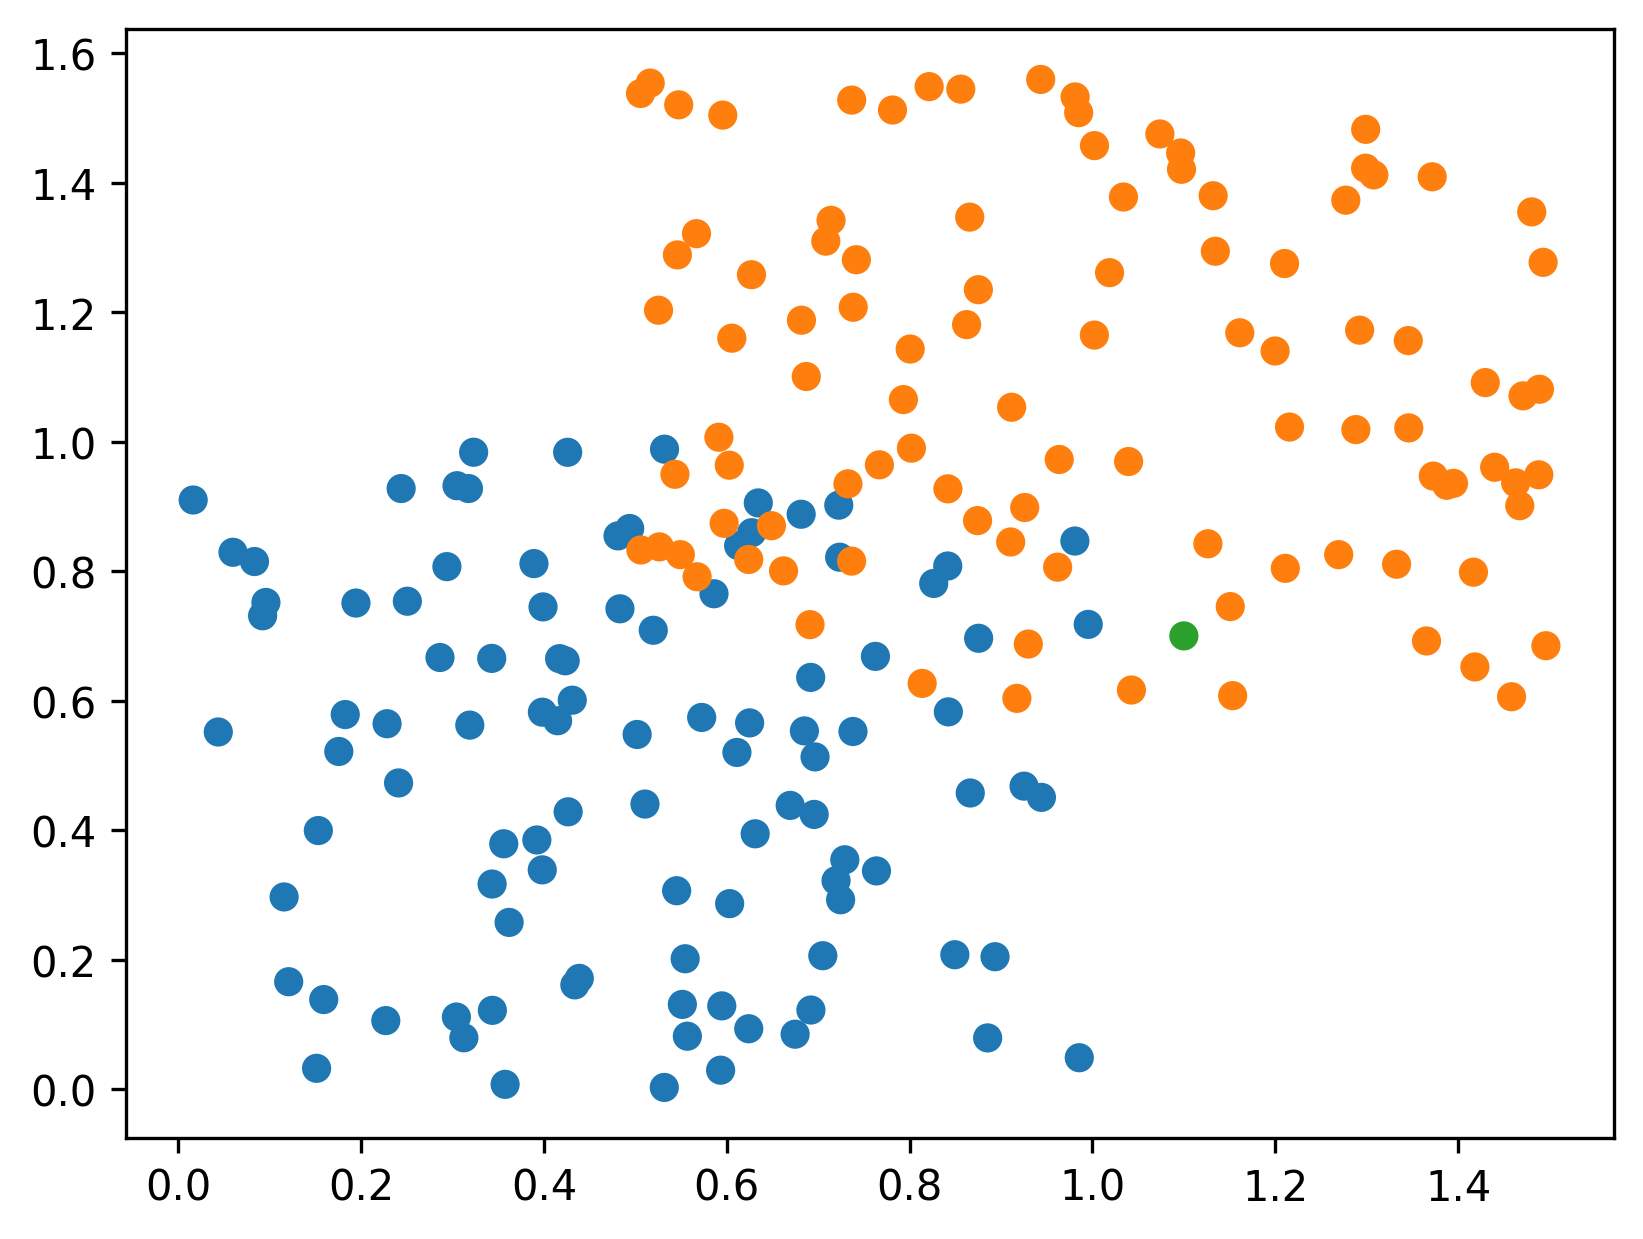

In [10]:
# To make the simpler visualization command work, we need to add a new color
colors.append('C2')
# Also, let's increase the figure size
plt.figure(dpi=300)
plt.scatter(final_df.feature1, final_df.feature2, c=colors)
plt.show()

In [11]:
final_df

,feature1,feature2,label
0,0.696469,0.513128,0.0
1,0.286139,0.666625,0.0
2,0.226851,0.105908,0.0
3,0.551315,0.130895,0.0
4,0.719469,0.321981,0.0
...,...,...,...
196,1.332716,0.810653,1.0
197,1.346055,1.021200,1.0
198,0.623923,0.818035,1.0
199,1.096487,1.445753,1.0


## Modify the point

In [12]:
# Test_index is the index for the new point in the DataFrame
test_index = final_df.index[len(final_df) - 1]
test_index

200

In [13]:
# Use .loc to access the last row and change its feature values
final_df.loc[test_index, 'feature1'] = 0.5
final_df.loc[test_index, 'feature2'] = 1.1
final_df

,feature1,feature2,label
0,0.696469,0.513128,0.0
1,0.286139,0.666625,0.0
2,0.226851,0.105908,0.0
3,0.551315,0.130895,0.0
4,0.719469,0.321981,0.0
...,...,...,...
196,1.332716,0.810653,1.0
197,1.346055,1.021200,1.0
198,0.623923,0.818035,1.0
199,1.096487,1.445753,1.0


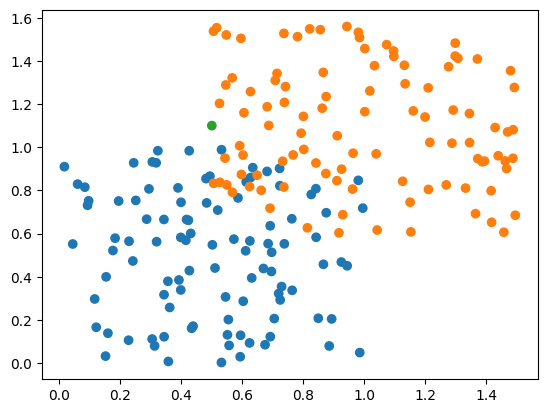

In [14]:
plt.scatter(final_df.feature1, final_df.feature2,
            c=['C' + str(int(c)) for c in final_df.label])
plt.show()

## Exercise: Write 1NN in Python native code
This section implements a simple nearest-neighbor algorithm. The distance between the test point (last point) and all other training points is calculated using the Euclidean distance. The class of the closest point is predicted as the label of the nearest training point.

In [23]:
# First, let's split data into training (existing points) and testing (new green point)
test_row = final_df.iloc[-1]
train_df = final_df.iloc[:-1]
test_row

feature1    0.5
feature2    1.1
label       2.0
Name: 200, dtype: float64

In [45]:
# Fill in your code here (ALL Python, no libraries used, even for computing distances :) 
# For each training data point x_i, compute distance between x_i and x_new
# Return distance and label for closest neighbor

def first_algo():
    length = len(train_df)
    current = 1000
    label = 0
    closest = 0
    for i in range(length) :
        train_row = train_df.iloc[i]
        distance = (train_row["feature1"] - test_row["feature1"]) ** 2 + \
              (train_row["feature2"] - test_row["feature2"]) ** 2
        if distance < current:
            closest = distance
            label = train_df["label"].loc[i]
    return np.sqrt(closest), label

first_algo()


(0.6894500824567409, 1.0)

## Exercise K > 1
Code a version that works for any k 

What class would it belong to?
K = 3?
K = 5?
K = 2? 

In [ ]:
# Fill in your code here (ALL Python, no libraries used, even for computing distances :) 


# Print out results
print(f'Closest distances: {distances}')
print(f'Labels of closest neighbors: {closest_labels}')
print(f'Predicted label (K={k}):', predicted_label)


## k-NN with Scikit-learn

In [46]:
# Reminder of the DataFrame structure
final_df.head()

,feature1,feature2,label
0,0.696469,0.513128,0.0
1,0.286139,0.666625,0.0
2,0.226851,0.105908,0.0
3,0.551315,0.130895,0.0
4,0.719469,0.321981,0.0


In [47]:
from sklearn import neighbors

# Use a bit more data on testing for demonstration
train_df = final_df.iloc[:190]
test_df = final_df.iloc[190:]
len(test_df) 

11

In [ ]:
# Play around with K
model = neighbors.KNeighborsClassifier(3)
features = ['feature1', 'feature2']
train_X = train_df[features]
train_y = train_df.label
# Model training
model.fit(train_X, train_y)

# Model testing
test_X = test_df[features]
predictions = model.predict(test_X)

predictions

### Probabilities for predictions
Play around with K more to see the effect on probabilities.
What do you observe?

In [ ]:
prediction = model.predict_proba(test_X)
prediction

# Decision Boundary Visualization

In [ ]:
feature1 = []
feature2 = []
# Create a mesh grid of points to cover the 2D feature space
# where each point has two coordinates: feature1 and feature2 
for f1 in np.arange(-.1, 1.6, .05):
    for f2 in np.arange(-.1, 1.8, .05):
        feature1.append(f1)
        feature2.append(f2)
df = pd.DataFrame({'feature1': feature1, 'feature2': feature2})
# Use the model to make predictions on the mesh grid so we can color-code it
prediction = model.predict(df) 
# Visualize mesh grid points with + marker
plt.scatter(df.feature1, df.feature2, marker='+', c=['C' + str(int(c)) for c in prediction])
plt.show()

In [ ]:
# Show without our original data on top
plt.scatter(df.feature1, df.feature2, marker='+', c=['C' + str(int(c)) for c in prediction])
plt.scatter(final_df.feature1, final_df.feature2,
            c=['C' + str(int(c)) for c in final_df.label])
plt.show()
# Play around with K to see the effect on the decision boundary

## Demonstration on real data

In [ ]:
# Link on course site
df = pd.read_csv('Raisin_Dataset.csv')
df.head()

In [ ]:
# Check number of data samples per label
df.label.value_counts()

In [ ]:
# Split into train and test, and we will use only 2 features for simplicity
train_df = df.iloc[:700]
test_df = df.iloc[700:]
features = ['major_axis_length', 'minor_axis_length']

In [ ]:
m2 = neighbors.KNeighborsClassifier(3)
m2.fit(train_df[features], train_df.label)
prediction = m2.predict(test_df[features])
prediction[:10] # predictions for the last 10 test data samples

In [ ]:
# Overall (avg) accuracy on test data
(prediction == test_df.label).mean()

### Scaling / distance problems

Now let's add the `convex_area` column. Observe this feature is on a different scale than the rest

In [ ]:
features = ['major_axis_length', 'minor_axis_length', 'convex_area']
m2 = neighbors.KNeighborsClassifier(3)
m2.fit(train_df[features], train_df.label)
prediction = m2.predict(test_df[features])
# Overall (avg) accuracy on test data
(prediction == test_df.label).mean()

Now let's employ standardization to bring all features to a same scale

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df[features])

scaled_train = scaler.transform(train_df[features])
scaled_train

In [ ]:
# Note: NOT re-fitting scaler on test data!!
scaled_test = scaler.transform(test_df[features])
scaled_test[0:10]

In [ ]:
m3 = neighbors.KNeighborsClassifier(3)
m3.fit(scaled_train, train_df.label)
prediction = m3.predict(scaled_test)

# Now accuracy is very slightly improved!
(prediction == test_df.label).mean()

### At home exercise: try other features with different scales. What do you observe?

## Final note: Kappa

In [ ]:
test_df.label.value_counts()

In [ ]:
# Slight imbalance might skew the accuracy slightly
# Cohen’s Kappa adjusts for the possibility of agreement by random chance, more conservative robust metric

In [ ]:
from sklearn import metrics

metrics.cohen_kappa_score(test_df.label, prediction)